In [1]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import requests
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Coin Flip

In [4]:
def coin_flip():
    return np.random.randint(0,2)

In [5]:
coin_flip()

1

In [6]:
#Empty list to store probabilities vals
list1=[]

def Monte_Carlo(n):
    results = 0
    
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result

        #calc probabilities vals
        prob_value = results/(i+1)

        #append the prob values to the list
        list1.append(prob_value)

        #plot result
        plt.axhline(y=.5,color='r',linestyle='-')
        plt.xlabel('iteration')
        plt.ylabel('probability')
        plt.plot(list1)
    return results/n


Final Value 0.52


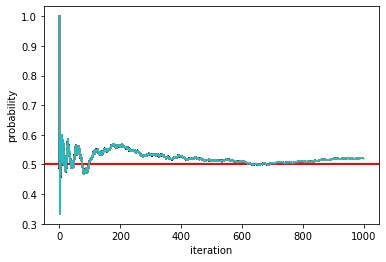

In [7]:
answer = Monte_Carlo(1000)
print('Final Value', answer)

## AAPL Stock

In [206]:
stock_data = pd.DataFrame()
stock_data = yf.download('AAPL', start = '2020-01-01', end = '2022-04-27')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449402,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200


In [207]:
closing_price = stock_data['Close']

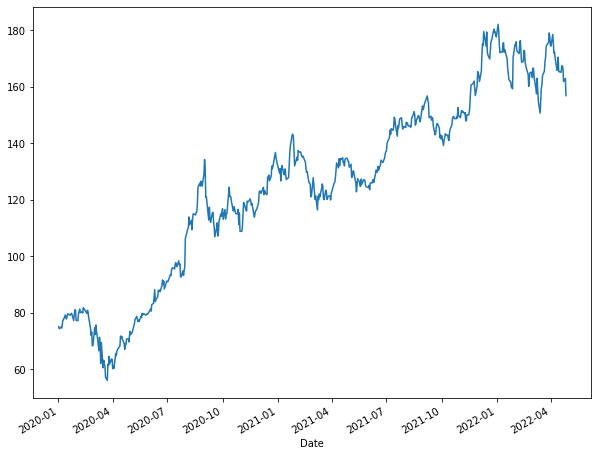

In [208]:
closing_price.plot(figsize = (10,8));

In [209]:
#Amount change in stock Price = Fixed drift rate + Random stochastic variable
#we need to find theses two parts- the drift and the random stochastic component

In [210]:
log_returns = np.log(1+closing_price.pct_change())

In [211]:
log_returns.tail()

Date
2022-04-20   -0.001016
2022-04-21   -0.004855
2022-04-22   -0.028216
2022-04-25    0.006715
2022-04-26   -0.038043
Name: Close, dtype: float64

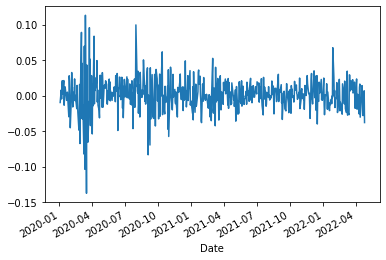

In [212]:
log_returns.plot();

In [213]:
#drift
u = log_returns.mean()
var = log_returns.var()
drift = u-(.5*var)
drift

0.0009975745905239258

In [214]:
stdev = log_returns.std()
stdev

0.023039307198314412

In [1]:
norm.ppf(.95)
#If an event has a 95% chance of occurring
#the distance between this event and the mean will be approximately 1.65 standard deviations.

NameError: name 'norm' is not defined

In [216]:
#use the numpy rand function to randomize this component
x = np.random.rand(10,2)

array([[0.30978266, 0.62472328],
       [0.22105062, 0.12865589],
       [0.77216371, 0.40159066],
       [0.76104293, 0.03658816],
       [0.5978746 , 0.89802646],
       [0.4217951 , 0.73874697],
       [0.76184483, 0.24098256],
       [0.42427766, 0.04475268],
       [0.37279629, 0.64465908],
       [0.34310283, 0.3003944 ]])

In [217]:
#We will include this random element within the “PPF” distribution 
#to obtain the distance from the mean corresponding to each of these randomly generated probabilities.
Z = norm.ppf(x)

array([[-0.49646649,  0.31790969],
       [-0.76864979, -1.13276777],
       [ 0.74599146, -0.24923201],
       [ 0.70966138, -1.79172945],
       [ 0.24784958,  1.27038624],
       [-0.19730328,  0.63948715],
       [ 0.7122494 , -0.70314544],
       [-0.19096207, -1.69801268],
       [-0.32445632,  0.3709405 ],
       [-0.4040096 , -0.52326651]])

In [218]:
#we want stock price predictions of next 1000 days with 20 iterations
t_intervals = 365
iterations = 300
daily_returns = np.exp(np.array(drift)+np.array(stdev)*norm.ppf(np.random.rand(t_intervals,iterations)))
print(daily_returns.shape)
print(daily_returns)

(365, 300)
[[0.99602308 0.9916719  1.00316479 ... 0.99186342 1.04206095 0.992448  ]
 [1.01458179 1.00930031 1.00935407 ... 1.01069018 1.01425697 0.97064603]
 [0.99846352 0.96535758 0.96917611 ... 1.01157169 1.01997506 0.99395914]
 ...
 [1.01489096 1.00547335 0.98731524 ... 0.98846068 1.03566747 1.00796447]
 [0.98824885 1.00172661 1.06659352 ... 1.01556273 0.95097938 1.01224086]
 [0.99673095 0.97789848 0.98325989 ... 0.9991235  1.02374083 0.97019464]]


In [219]:
#calculate future stock price by this formula
# S1 = S0 * daily return
#here, S0 = stock price at day t
# S1 = stock price at day t+1

In [220]:
#create new array at same size but start as all zeros

s0 = closing_price.iloc[-1]
s0

156.8000030517578

In [221]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
price_list[0] = s0
price_list

array([[156.80000305, 156.80000305, 156.80000305, ..., 156.80000305,
        156.80000305, 156.80000305],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [223]:
for t in range (1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [224]:
price_list

array([[156.80000305, 156.80000305, 156.80000305, ..., 156.80000305,
        156.80000305, 156.80000305],
       [159.08642759, 158.25829157, 158.26672055, ..., 158.47622277,
        159.03549616, 152.19730011],
       [158.841995  , 152.77584159, 153.38832486, ..., 160.31006019,
        162.21224018, 151.27789716],
       ...,
       [268.78183731, 125.58129957, 373.01595006, ..., 124.2637251 ,
        280.50085558, 206.74569732],
       [265.6233427 , 125.79812903, 397.85639473, ..., 126.19760795,
        266.75052989, 209.27644181],
       [264.75500749, 123.01779858, 391.19623372, ..., 126.08699589,
        273.08340998, 203.03888188]])

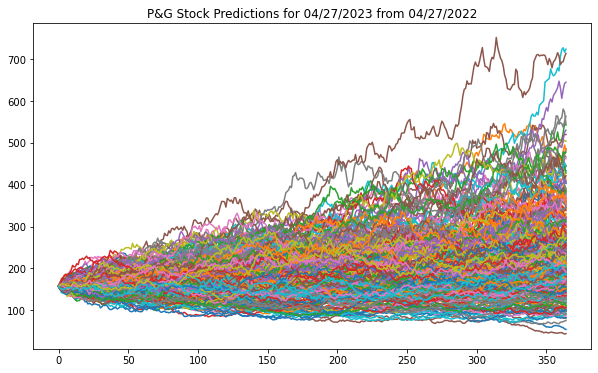

In [225]:
plt.figure(figsize = (10,6));
plt.plot(price_list);
plt.title('P&G Stock Predictions for 04/27/2023 from 04/27/2022');

In [226]:
print('Expected price: ', round(np.mean(price_list),2))
print('Quantile (5%) ',np.percentile((price_list),5))
print('Quantile (95%) ',np.percentile((price_list),95))

Expected price:  193.56
Quantile (5%)  110.67646269885019
Quantile (95%)  322.85352195628434


## Football Matches

In [236]:
shot_data = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\ucl_shot_data.csv', index_col =0)
match_data = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\match_info_data.csv', index_col =0)

In [240]:
shot_data.shape

(2491, 26)

In [238]:
shot_data = shot_data[shot_data['is_own_goal'] == False]

In [241]:
shot_data.shape

(2491, 26)

**Note from https://www.sonofacorner.com/an-introduction-to-monte-carlo/<br/><br/>
Here's what the code does- Writing code that simulates a single random experiment of our match.<br/>**
We first filter our shot DataFrame and split it into two. One for the home team, and one for the away team.<br/>
Next, we iterate over each shot taken by each side and flip a biased coin to count the occasions where the shot was randomly sampled as a goal. This is done by generating a number between 0 and 1; if the number sampled is less than the shot's xG then it's a goal, else it's a miss. Notice how the higher the xG, the higher the chance that the outcome's a goal.<br/>
We sum up the results in each iteration and return a random scoreline.

In [242]:
def simulate_match_on_shots(match_id, shot_df, home_team_id, away_team_id):
    '''
    This function takes a match ID and simulates an outcome based on the shots
    taken by each team.
    '''

    shots = shot_data[shot_data['match_id'] == match_id]

    shots_home = shots[shots['team_id'] == home_team_id]
    shots_away = shots[shots['team_id'] == away_team_id]

    home_goals = 0
    # If shots == 0 then there's no sampling
    if shots_home['xG'].shape[0] > 0:
        for shot in shots_home['xG']:
            # Sample a number between 0 and 1
            prob = np.random.random()
            # If the probability sampled is less than the xG then it's a goal.
            if prob < shot:
                home_goals += 1
    away_goals = 0
    if shots_away['xG'].shape[0] > 0:
        for shot in shots_away['xG']:
            # Sample a number between 0 and 1
            prob = np.random.random()
            # If the probability sampled is less than the xG then it's a goal.
            if prob < shot:
                away_goals += 1
    return {'home_goals':home_goals, 'away_goals':away_goals}